# Chapter 7: Ensemble Learning and Random Forests


In [1]:
from sklearn.datasets import load_iris

import numpy as np

import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

x, y = make_moons(n_samples=100000, noise=0.2)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [2]:
log_clf = LogisticRegression()

rnd_clf = RandomForestClassifier()

svm_clf = SVC()

voting_clf = VotingClassifier([('lr', log_clf),('rf', rnd_clf),('svc', svm_clf)], voting='hard')

voting_clf.fit(x_train,y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [3]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))
    

LogisticRegression 0.87152
RandomForestClassifier 0.96784
SVC 0.97184
VotingClassifier 0.97028


# Bagging

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(x_train,y_train)

y_pred = bag_clf.predict(x_test)

bag_clf.oob_score_

0.9595466666666667

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.96072

In [7]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16)

rnd_clf.fit(x_train,y_train)

y_pred = rnd_clf.predict(x_test)

accuracy_score(y_test,y_pred)


0.96852

In [8]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter='random', max_leaf_nodes=16),n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)


bag_clf.fit(x_train,y_train)

y_pred = bag_clf.predict(x_test)

accuracy_score(y_test,y_pred)

0.96268

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()

rnd_clf=RandomForestClassifier(n_estimators=500, n_jobs=-1)

rnd_clf.fit(iris['data'],iris['target'])

for name, score in zip(iris['feature_names'],rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.10175848423467926
sepal width (cm) 0.025175418797653715
petal length (cm) 0.43527017891111563
petal width (cm) 0.4377959180565513


In [10]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200,algorithm='SAMME.R', learning_rate=0.5)

ada_clf.fit(x_train,y_train)

y_pred = ada_clf.predict(x_test)

accuracy_score(y_test,y_pred)


0.97096

# Boosting

In [11]:
x = 5 - 10*np.random.rand(1000)

y = 100*x**2 + np.random.rand(1000)*800 + np.random.rand(1000)*6*np.random.rand(1000)*0.5


x_new = 5 - 10*np.random.rand(1000)


y_new = 100*x_new**2 + np.random.rand(1000)*800 + np.random.rand(1000)*6*np.random.rand(1000)*0.5


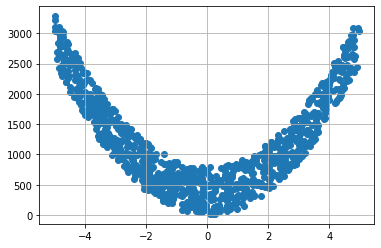

In [12]:
plt.scatter(x,y)
plt.grid()


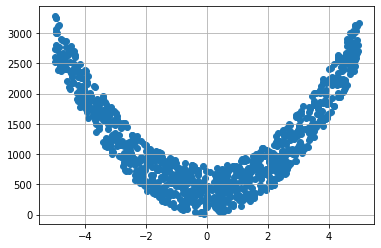

In [13]:
plt.scatter(x_new,y_new)
plt.grid()

x = x.reshape(-1,1)

y = y.reshape(-1,1)

x_new = x_new.reshape(-1,1)

y_new = y_new.reshape(-1,1)

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(x,y)
y2 = y -tree_reg1.predict(x)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(x,y2)
y3 = y2 -tree_reg2.predict(x)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(x,y3)

y_pred = sum(tree.predict(x_new) for tree in (tree_reg1, tree_reg2, tree_reg3))


In [15]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1)
gbrt.fit(x.reshape(-1,1),y.reshape(-1,1).ravel())

GradientBoostingRegressor(learning_rate=1, max_depth=2, n_estimators=3)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train,x_val,y_train,y_val = train_test_split(x,y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(x_train.reshape(-1,1),y_train.reshape(-1,1).ravel())

errors = [mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(x_val)]

bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)


gbrt_best.fit(x_train,y_train)

y_pred = gbrt_best.predict(x_val)

/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


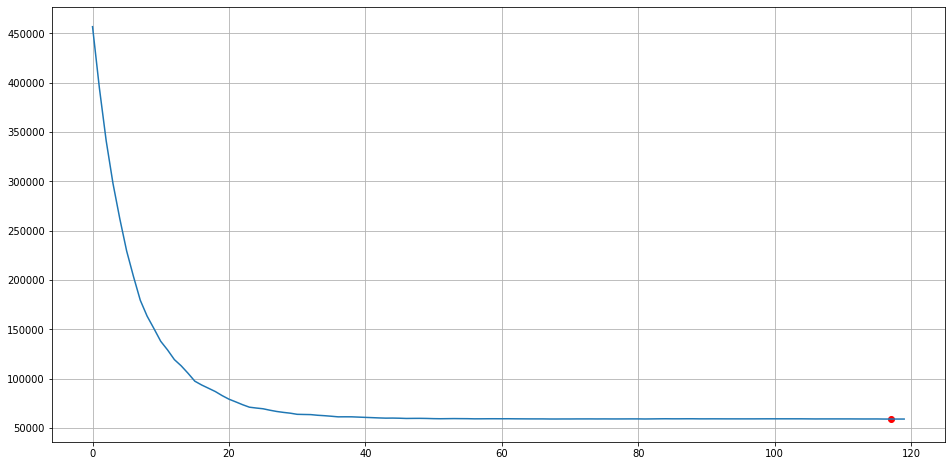

In [17]:
plt.figure(figsize=(16,8))
plt.plot(errors)
plt.grid()
plt.scatter(bst_n_estimators,errors[bst_n_estimators], color='red')

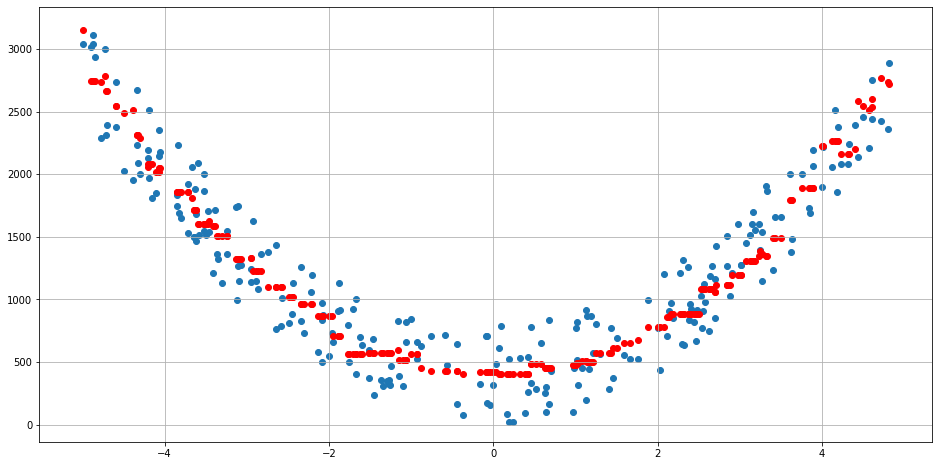

In [18]:
plt.figure(figsize=(16,8))
plt.scatter(x_val,y_val)
plt.scatter(x_val,y_pred, color='red')
plt.grid()

In [19]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float('inf')

error_going_up = 0

for n_estimators in range(1,120):
    
    gbrt.n_estimators=n_estimators
    
    gbrt.fit(x_train.reshape(-1,1),y_train.reshape(-1,1).ravel())
    
    y_pred = gbrt_best.predict(x_val)
    
    val_error = mean_squared_error(y_val, y_pred)
    
    if val_error < min_val_error:
        
        min_val_error = val_error
        error_going_up=0
    else:
        error_going_up += 1
        
        if error_going_up ==3:
            break
        
min_val_error

59257.25791428431

In [20]:
import xgboost

xgb = xgboost.XGBRegressor()

xgb.fit(x_train,y_train)

y_pred = xgb.predict(x_val)

mean_squared_error(y_val, y_pred)


72581.49431125098

# Exercises

### If you have trained five different models on the exact same training data, and they all achieve 95% precision, is there any chance that you can combine these models to get better results? If so, How? If not, Why?

Yes, we can combine different models by taking the awnsers mode (hard voting) or averaging the predicted value or probability (soft voting).

### What is the difference between hard & soft voting classifiers? 

Hard voting = most frequently predicted class (mode);
Soft voting = average of predicted values or probabilitys;

### Is it possible to speed up training of a bagging ensemble by distributing it across multiple servers? What about pasting ensembles? Boosting ensembles, random forests, stacking ensembles?

Boosting Ensemble (sequentially) isn't parallelizable;
Bagging Ensemble (Bootstrap Sampling with replacement) is parallelizable;
Pasting Ensemble (Only difference — Sampling without replacement) is parallelizable;
Random Forests is parallelizable;

### What is the benefit of out-of-bag evaluation?

If we use subsets from the training dataset while training, we can evaluate each individual predictor on the unsampled data and estimate the overall performance of the ensemble model without having a hold-out validation set.

### What makes Extra-Trees more random than regular random forests? How can this extra randomness help? Are extra trees slower or faster than regular random forests?

Extra-Trees are more random than regular random forests because they choose a random subset of features to select. This randomness helps in creating more varied trees and helps in training models.

Extra-trees are faster then regular random forests because they don't have to check for the best split on all features and thresholds;

### If your Adaboost ensemble underfits the training data, which hyper-parameters should you tweak and how?

We should increase the number of estimators and reduce the regularization hyper-parameters, or we can increase the learning rate;

### If your gradient boosting ensemble overfits the training set, should you increase or decrease the learning rate?

We should decrease the learning rate;

### Load MNIST data, and split it into a training set, a validation set, and a test set (Use 50k instances for training, 10k for validation, and 10k for testing)


In [21]:
from sklearn import datasets
X, y = datasets.fetch_openml(name='mnist_784', return_X_y=True)
X.shape, y.shape

((70000, 784), (70000,))

In [23]:
random_indices = np.random.permutation(X.shape[0])

X = X[random_indices]
y = y[random_indices]

X_train, y_train = X[:50000], y[:50000]
X_val, y_val = X[50000:60000], y[50000:60000]
X_test, y_test = X[60000:], y[60000:]

X_train, y_train = X_train[:5000], y_train[:5000]
X_val, y_val = X_val[:1000], y_val[:1000]
X_test, y_test = X_test[:1000], y_test[:1000]

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score as acc

rf_c = RandomForestClassifier(n_estimators=10)
et_c = ExtraTreesClassifier(n_estimators=10)
svc = SVC(probability=True)


In [24]:
rf_c.fit(X_train, y_train)
et_c.fit(X_train, y_train)
svc.fit(X_train, y_train)
acc(y_val, rf_c.predict(X_val)), acc(y_val, et_c.predict(X_val)), acc(y_val, svc.predict(X_val))

(0.89, 0.892, 0.949)

In [25]:
from sklearn.ensemble import VotingClassifier

hard_voter = VotingClassifier(estimators=[('random forest', rf_c), ('extra trees', et_c), ('support vector classifier', svc)], n_jobs=-1)


hard_voter.fit(X_train, y_train)

VotingClassifier(estimators=[('random forest',
                              RandomForestClassifier(n_estimators=10)),
                             ('extra trees',
                              ExtraTreesClassifier(n_estimators=10)),
                             ('support vector classifier',
                              SVC(probability=True))],
                 n_jobs=-1)

In [26]:
soft_voter = VotingClassifier(estimators=[('random forest', rfc), ('extra trees', etc),('support vector classifier', svc)],voting='soft',n_jobs=-1)


soft_voter.fit(X_train, y_train)


VotingClassifier(estimators=[('random forest',
                              RandomForestClassifier(n_estimators=10)),
                             ('extra trees',
                              ExtraTreesClassifier(n_estimators=10)),
                             ('support vector classifier',
                              SVC(probability=True))],
                 n_jobs=-1, voting='soft')

In [27]:
acc(y_val, hard_voter.predict(X_val))

0.934

In [28]:
acc(y_val, soft_voter.predict(X_val))

0.952

In [30]:
acc(y_test, rf_c.predict(X_test)), acc(y_val, et_c.predict(X_val)), acc(y_test, svc.predict(X_test))

(0.884, 0.892, 0.95)

In [31]:
acc(y_test, soft_voter.predict(X_test))

0.95

In [32]:
acc(y_test, hard_voter.predict(X_test))

0.934

In [33]:
# blender

etc_preds = et_c.predict(X_val)[..., None]
rfc_preds = rf_c.predict(X_val)[..., None]
svc_preds = svc.predict(X_val)[..., None]
etc_preds.shape, rfc_preds.shape, svc_preds.shape

X_val_ = np.concatenate((etc_preds, rfc_preds, etc_preds), axis=1)



rfc_ = RandomForestClassifier(n_estimators=10)


rfc_.fit(X_val_, y_val)



etc_preds = et_c.predict(X_test)[..., None]
rfc_preds = rf_c.predict(X_test)[..., None]
svc_preds = svc.predict(X_test)[..., None]


X_test_ = np.concatenate((etc_preds, rfc_preds, etc_preds), axis=1)



y_test_ = rfc_.predict(X_test_)



acc(y_test, y_test_)


0.877